In [439]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import scipy.stats as stats
from math import (
    exp,
    factorial,
    log10,
    sqrt
)

In [440]:
# Returns n choose r
def choose(n, r):
    return factorial(n) // factorial(r) // factorial (n-r)

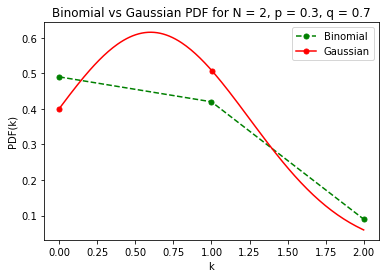

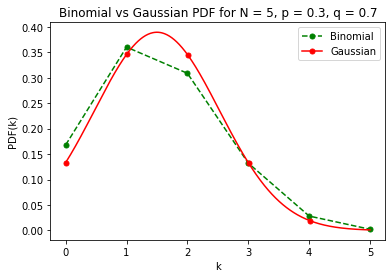

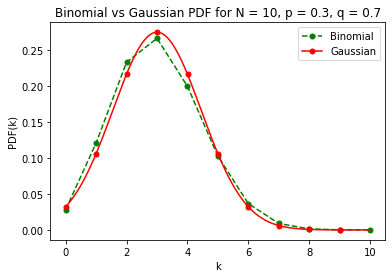

In [441]:
'''
(a)
'''
p = .3
q = 1 - p
num_samples = [2, 5, 10]

for n in num_samples:
    k_list = list(range(n+1))
    # Calculate the binomial probabilities for k = 0, 1, ..., n
    bino_pdf = []
    for k in k_list:
        bino_pdf.append(choose(n, k) * (p ** k) * (q ** (n - k)))

    # Plot the binomial probabilities vs the Gaussian distribution
    plt.plot(k_list, bino_pdf, color = "green", ls = "--", marker = ".", ms = 10, label = "Binomial")

    mean = n * p
    sd = sqrt(n * p * q)
    continous_k = numpy.linspace(0, n, n * 100)
    plt.plot(continous_k, stats.norm.pdf(continous_k, mean, sd), color = "red", marker = ".", markevery = 100, ms = 10, label = "Gaussian")

    plt.title(f"Binomial vs Gaussian PDF for N = {n}, p = {p}, q = {q}")
    plt.xlabel("k")
    plt.ylabel("PDF(k)")
    plt.legend()
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


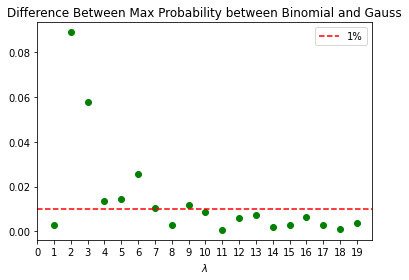

In [442]:
num_trials = 20
# Iterate through values of n until the difference between the max probability
# between the Binomial and Gaussian are within 1% of each other 
diffs = []
for n in range(num_trials):
    k_list = list(range(n+1))
    # Calculate the binomial probabilities for k = 0, 1, ..., n
    bino_pdf = []
    for k in k_list:
        bino_pdf.append(choose(n, k) * (p ** k) * (q ** (n - k)))
    max_bino_pdf = max(bino_pdf)
    max_k = bino_pdf.index(max_bino_pdf)
    
    mean = n * p
    sd = sqrt(n * p * q)
    gauss_pdf = stats.norm.pdf(max_k, mean, sd)

    diff = abs(max_bino_pdf - gauss_pdf)
    diffs.append(diff)

plt.scatter(range(len(diffs)), diffs, color = "green")
plt.title("Difference Between Max Probability between Binomial and Gauss")
plt.xlabel(r"$\lambda$")
plt.xticks(range(num_trials))
plt.axhline(y = .01, color = "red", ls = "--", label = "1%")
plt.legend()

At and after k = 10, the difference between max probabilities between Binomial and Gaussian is consistently below 1%.

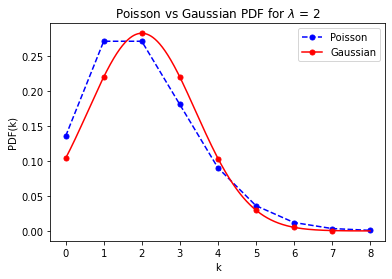

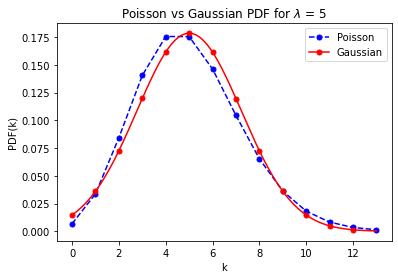

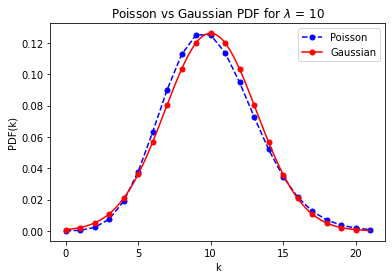

In [443]:
'''
(b)
'''
lambdas = [2, 5, 10]
for l in lambdas:
    # Calculate the Poisson probabilities for k = 0, 1, ..., n
    poisson_pdf = []
    k = 0
    # I calculate PDF(k) until we have captured 99.9% of the occurences
    sum_prob = 0
    while True:
        prob = (l ** k) * exp(-l) / factorial(k)
        poisson_pdf.append(prob)
        sum_prob += prob
        k += 1
        if sum_prob > .999:
            break
    k_list = list(range(len(poisson_pdf)))

    # Plot the binomial probabilities vs the Gaussian distribution
    plt.plot(k_list, poisson_pdf, color = "blue", ls = "--", marker = ".", ms = 10, label = "Poisson")

    mean = l
    sd = sqrt(l)
    continous_k = numpy.linspace(0, len(k_list) - 1, (len(k_list) - 1) * 100)
    plt.plot(continous_k, stats.norm.pdf(continous_k, mean, sd), color = "red", marker = ".", markevery = 100, ms = 10, label = "Gaussian")

    plt.title(r"Poisson vs Gaussian PDF for $\lambda$ = " + f"{l}")
    plt.xlabel("k")
    plt.ylabel("PDF(k)")
    plt.legend()
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


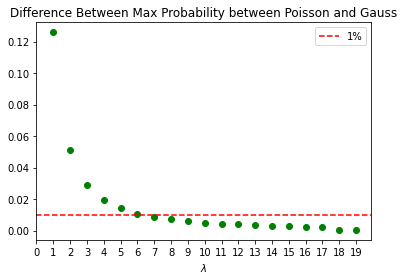

In [444]:
# Iterate through values of n until the difference between the max probability
# between the Poisson and Gaussian are within 1% of each other
diffs = []
for l in range(20):
    # Calculate the Poisson probabilities for k = 0, 1, ..., n
    poisson_pdf = []
    k = 0
    # I calculate PDF(k) until we have captured 99.9% of the occurences
    sum_prob = 0
    while True:
        prob = (l ** k) * exp(-l) / factorial(k)
        poisson_pdf.append(prob)
        sum_prob += prob
        k += 1
        if sum_prob > .999:
            break
    max_poisson_pdf = max(poisson_pdf)
    max_index = poisson_pdf.index(max_poisson_pdf)

    mean = l
    sd = sqrt(l)
    
    gauss_pdf = stats.norm.pdf(max_index, mean, sd)
    diff = abs(max_poisson_pdf - gauss_pdf)
    diffs.append(diff)

plt.scatter(range(len(diffs)), diffs, color = "green")
plt.title("Difference Between Max Probability between Poisson and Gauss")
plt.xlabel(r"$\lambda$")
plt.xticks(range(num_trials))
plt.axhline(y = .01, color = "red", ls = "--", label = "1%")
plt.legend()
    

At and after k = 7, the difference between max probabilities between Poisson and Gaussian is consistently below 1%.

   diameter
0   939.400
1   545.000
2   246.596
3   525.400
4   106.699
5   185.180
6   199.830
7   147.491
8   190.000
9   407.120


Text(0, 0.5, 'Asteroid and Comet Count')

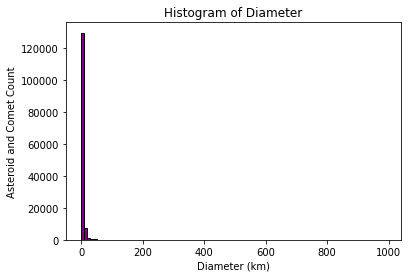

In [445]:
'''
QUESTION 4
'''
nasa_data = pd.read_csv("nasa_data.csv")
print(nasa_data.head(10))

diameters = list(nasa_data.diameter)

bin_count, bin_edges, _ = plt.hist(diameters, color = "purple", bins = range(0, 1000, 10), edgecolor = "black")
plt.title("Histogram of Diameter")
plt.xlabel("Diameter (km)")
plt.ylabel("Asteroid and Comet Count")

In [446]:
log_diameters = list(map(log10, diameters))
bin_count = list(map(lambda x: log10(x+1), bin_count))
# Calculate the midpoint of our bin edges
bin_mid = []
for i in range (0, len(bin_edges) - 1):
    bin_mid.append((bin_edges[i] + bin_edges[i+1]) / 2)
bin_mid = list(map(log10, bin_mid))

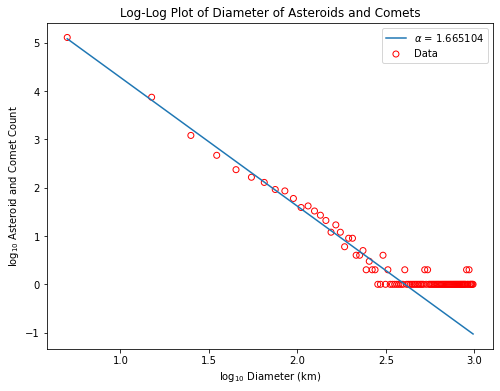

In [447]:
plt.figure(figsize = (8, 6))
plt.scatter(bin_mid, bin_count, color = "red", facecolors = "none", label = "Data")

# Commented out for now but this is how I determined which bins to include in my range to fit data
#for i in range(len(bin_count)):
#    print(f"Bin {i}: {bin_count[i]}")
    
fit_range = bin_mid[:28]
fit_count = bin_count[:28]

m, b = numpy.polyfit(fit_range, fit_count, 1)
best_fit_data = list(map(lambda x: x * m + b, bin_mid))
alpha = abs(m) - 1
plt.plot(bin_mid, best_fit_data, label = r"$\alpha$ = " + f"{round(alpha, 6)}")
plt.title("Log-Log Plot of Diameter of Asteroids and Comets")
plt.xlabel(r"$\log_{10}$ Diameter (km)")
plt.ylabel(r"$\log_{10}$ Asteroid and Comet Count")
plt.legend()


I chose the range to determine my line of best fit by printing and looking at the count associated with each of my bin numbers. I then noticed that after the 27th bin, there were lots of 0s in my data which would skew the line of best fit so I chose to only look at the first 27 bins. As can seen above, from my line of best fit, I obtained $\alpha \approx 1.665104$.